2025 done.
Downcasting floats.


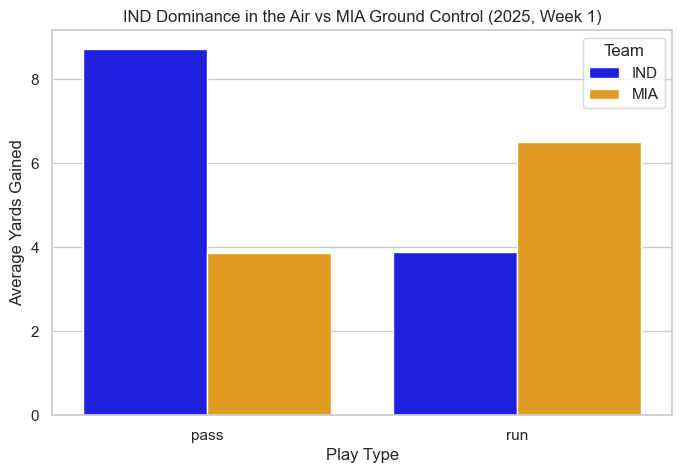

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nfl_data_py as nfl

# Load play-by-play data for the 2025 season and filter for week 1
pbp_2025 = nfl.import_pbp_data([2025])
pbp_g1 = pbp_2025[pbp_2025['week'] == 1]

# Filter for Colts (IND) and Dolphins (MIA), and play types 'run' or 'pass'
filtered = pbp_g1[
    (pbp_g1['posteam'].isin(['IND', 'MIA'])) &
    (pbp_g1['play_type'].isin(['run', 'pass']))
]

# Group by team and play type, then compute average yards gained
avg_yards = (
    filtered.groupby(['posteam', 'play_type'], as_index=False)
    .agg(avg_yards=('yards_gained', 'mean'))
)

# Plot using seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.barplot(
    data=avg_yards,
    x="play_type",
    y="avg_yards",
    hue="posteam",
    palette={"IND": "blue", "MIA": "orange"}
)

plt.title("IND Dominance in the Air vs MIA Ground Control (2025, Week 1)")
plt.xlabel("Play Type")
plt.ylabel("Average Yards Gained")
plt.legend(title="Team")

plt.show()


/var/folders/zy/zhqnxw4n3gx553hrq1vzrmz00000gn/T/ipykernel_40081/3072965643.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


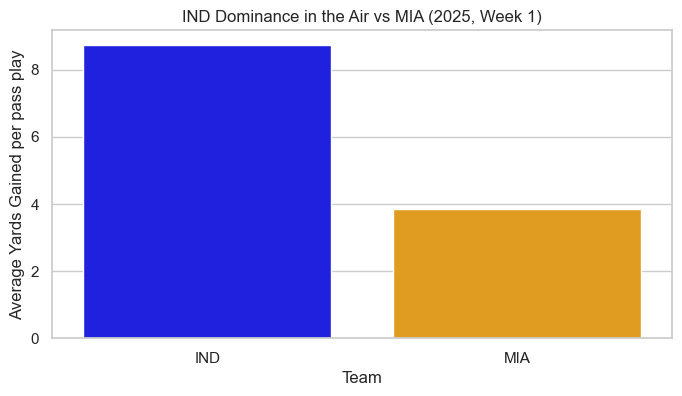

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for Colts (IND) and Dolphins (MIA)
filtered = pbp_g1[
    (pbp_g1['posteam'].isin(['IND', 'MIA'])) &
    (pbp_g1['play_type'].isin(['pass']))
]

# Compute overall average yards gained per team
avg_yards_team = (
    filtered.groupby('posteam', as_index=False)
    .agg(avg_yards=('yards_gained', 'mean'))
)

# Plot
sns.set(style="whitegrid")

plt.figure(figsize=(8, 4))
sns.barplot(
    data=avg_yards_team,
    x="posteam",
    y="avg_yards",
    palette={"IND": "blue", "MIA": "orange"}
)

plt.title("IND Dominance in the Air vs MIA (2025, Week 1)")
plt.xlabel("Team")
plt.ylabel("Average Yards Gained per pass play")

plt.show()
